In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from lmfit import Parameters, minimize, fit_report
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a* x **b
        
        return y_fit-y

In [3]:
dataBase_path = r'./'
dataBase_file = r'phillips_COT_data.xlsx'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
optimumDF = pd.read_excel(data_path, sheet_name = 'OptimumCOT')

In [5]:
# break up the data frame into perspective locomotion modes
bio_modes = optimumDF['Species'].unique()

optimum_dfs = [optimumDF[optimumDF['Species']==mode] for mode in bio_modes]

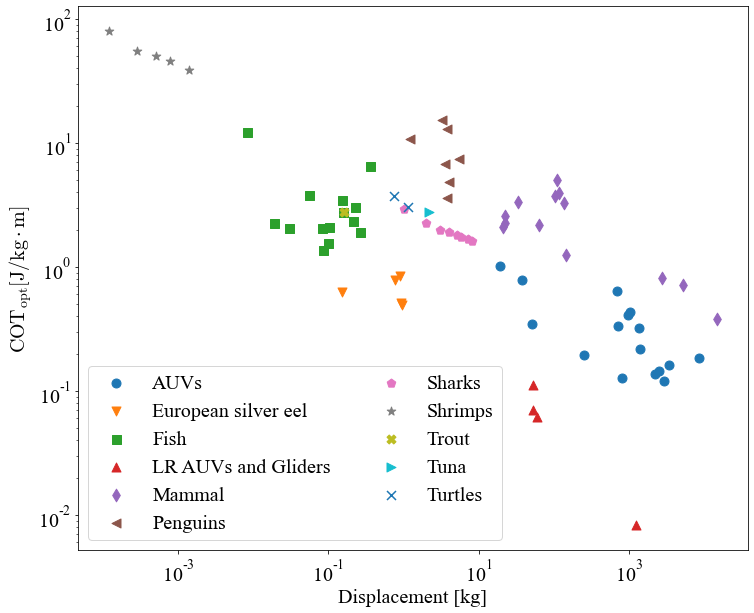

In [6]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')

markers = ['o', 'v', 's', '^', 'd', '<', 'p', '*', 'X', '>', 'x', 'v', 's', '^', 'd', '<', 'p', '*', 'X', '>']

for i, mode in enumerate(bio_modes):
    ax1.scatter(optimum_dfs[i]['Displacement'].values, optimum_dfs[i]['COT'].values, marker=markers[i], label=mode)

ax1.set_xlabel('Displacement [kg]')
ax1.set_ylabel('$\mathrm{COT_{opt} [J/kg \cdot m]}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc=3, ncol=2)
fig1.savefig('Phillips_COT_comparison.pdf', facecolor='w', dpi=300, bbox_inches='tight')